# Bayesian Homework 2
**Q1, Q2, Q3**

This notebook contains three questions demonstrating the basics of a Beta-Binomial Bayesian inference workflow:
- **Q1**: Given a Beta(2,2) prior and binomial observations, derive the posterior distribution and compute the posterior mean.  
- **Q2**: Compare and visualize the prior and posterior distributions on one plot.  
- **Q3**: Use the posterior predictive distribution to generate simulated future observations and display them via a histogram.

In [5]:
# -------------------------------------------------------------
# Necessary imports
# -------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# Q1. Beta-Binomial Posterior and Posterior Mean

**Problem Statement**:  
We have a Beta(2,2) prior for the parameter θ of a Bernoulli process. Observe n=20 Bernoulli trials, out of which k=7 are successes.

1. Write down the posterior distribution \( \text{Beta}(\alpha + k, \beta + n - k) \) and compute the posterior mean.  
2. Print the result and briefly explain what it implies.

**Key**:  
- The prior is Beta(\(\alpha=2,\beta=2\)).  
- After observing k=7 successes out of n=20, the posterior is \( \text{Beta}(2+7, 2+(20-7)) = \text{Beta}(9, 15) \).  
- The posterior mean for a Beta(\(\alpha, \beta\)) is \(\alpha / (\alpha + \beta)\).

In [6]:
# -------------------------------------------------------------
# Q1
# -------------------------------------------------------------
def posterior_mean(alpha_prior, beta_prior, k, n):
    """
    Computes the posterior parameters alpha_post = alpha_prior + k,
    beta_post  = beta_prior + (n - k), and returns the posterior mean.
    """
    alpha_post = alpha_prior + k
    beta_post  = beta_prior + (n - k)
    mean_post  = alpha_post / (alpha_post + beta_post)
    return alpha_post, beta_post, mean_post

# Prior: Beta(2,2)
alpha_prior = 2
beta_prior  = 2

# Observations: n=20, k=7
n_obs = 20
k_obs = 7

alpha_post, beta_post, mean_post = posterior_mean(alpha_prior, beta_prior, k_obs, n_obs)
print(f"Q1: Posterior ~ Beta({alpha_post}, {beta_post})")
print(f"Q1: Posterior mean = {mean_post:.4f}")

Q1: Posterior ~ Beta(9, 15)
Q1: Posterior mean = 0.3750


# Q2. Visualizing Prior vs. Posterior

**Problem Statement**:  
On the same plot, display the Beta(2,2) prior PDF and the Beta(9,15) posterior PDF. Compare their shapes and peak locations.

**Key**:  
- Generate an `x_grid` from 0 to 1, compute `beta.pdf` for both the prior and the posterior, and overlay them on a single figure.

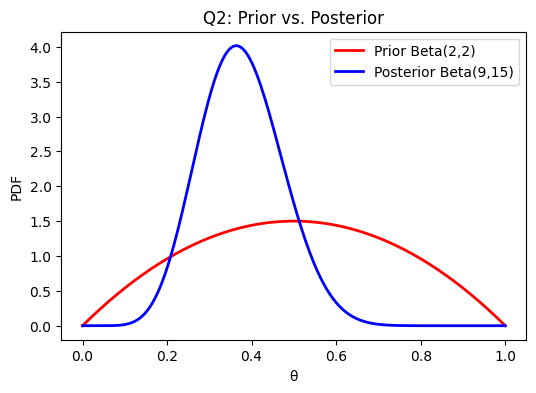

In [7]:
# -------------------------------------------------------------
# Q2
# -------------------------------------------------------------
x_grid = np.linspace(0, 1, 200)

# PDFs for prior and posterior
prior_pdf = beta.pdf(x_grid, alpha_prior, beta_prior)
post_pdf  = beta.pdf(x_grid, alpha_post, beta_post)

plt.figure(figsize=(6,4))
plt.plot(x_grid, prior_pdf, 'r-', label=f"Prior Beta({alpha_prior},{beta_prior})", linewidth=2)
plt.plot(x_grid, post_pdf,  'b-', label=f"Posterior Beta({alpha_post},{beta_post})", linewidth=2)
plt.xlabel("θ")
plt.ylabel("PDF")
plt.title("Q2: Prior vs. Posterior")
plt.legend()
plt.show()

# Q3. Posterior Predictive Distribution

**Problem Statement**:  
Based on the posterior Beta(9,15), to predict future Bernoulli trials. 
1. Draw samples of θ from the posterior.  
2. For each sampled θ, generate binomial outcomes for a new set of trials.  
3. Plot a histogram of the resulting distribution of successes.

In this example, assume we will conduct 100 future Bernoulli trials, and repeat this entire simulation process 10,000 times.

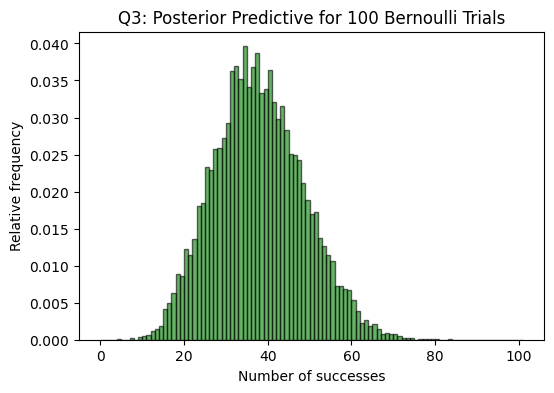

Q3: Simulated mean of future successes = 37.3967


In [8]:
# -------------------------------------------------------------
# Q3
# -------------------------------------------------------------
num_sim = 10000   # number of posterior draws
future_n = 100    # size of future Bernoulli trial set

# 1) Sample from posterior Beta(9,15)
theta_samples = beta.rvs(alpha_post, beta_post, size=num_sim)

# 2) For each θ, simulate future_n Bernoulli trials to get a count of successes
future_success_counts = binom.rvs(n=future_n, p=theta_samples)

# 3) Plot histogram of success counts
plt.figure(figsize=(6,4))
plt.hist(future_success_counts, bins=range(future_n+2), density=True,
         alpha=0.6, color='g', edgecolor='black')
plt.title(f"Q3: Posterior Predictive for {future_n} Bernoulli Trials")
plt.xlabel("Number of successes")
plt.ylabel("Relative frequency")
plt.show()

print("Q3: Simulated mean of future successes =", np.mean(future_success_counts))

---
## Summary of HW2

- **Q1**: Calculated the posterior Beta(9,15) with mean ≈ 0.375.  
- **Q2**: Compared Beta(2,2) and Beta(9,15) PDFs. The posterior shifts toward lower success probabilities because we observed 7 successes out of 20.  
- **Q3**: Used the posterior predictive distribution to simulate future observations. The histogram of simulated success counts has a mean around 0.375 × 100 = 37-38 successes, consistent with the posterior mean.  